# Case study: #1
# Data Analyst: George Vellis
# Email: vellis41@gmail.com

About the project

Google data analysis professional certificate case study. 

The concept: Bellabet, a technology company which is specialized in fitness tracker bands, wearables, and smartwatches asked to proceed with the data analysis of a dataset from data of a fitness tracker from another company and the business task is to identify trends and insights that will help the Bellabet company to improve their products and also their upcoming marketing campaign. The limitation of the data is that the data set contains only the data from 30 users.

In [1]:
# Analyzing several data sets collected by a fitness tracker device with the aim to identify insights and trends.
# This case study is the last course of the Google Data Analytics Professional Certificate program.
# Data collected by Mobius.

In [2]:
# Installing the packages

install.packages("tidyverse")
install.packages("janitor")
install.packages("skimr")
install.packages("here")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘janitor’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Instal

In [3]:
# Loading the packages

library(tidyverse)
library(dplyr)
library(readr)
library(tidyr)
library(lubridate)
library(janitor)
library(skimr)
library(here)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working



In [4]:
# Importing and renaming the .csv data sets from

daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
daily_sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_info <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

In [5]:
# Reviewing the headers of the daily data and weight data
head(daily_activity)
head(daily_sleep)
head(daily_steps)
head(weight_info)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [6]:
# Cleaning the columns names

daily_activity <- clean_names(daily_activity)
daily_sleep <- clean_names(daily_sleep)
daily_steps <-clean_names(daily_steps)
weight_info <- clean_names(weight_info)

In [7]:
# Formatting the datatype

daily_activity$activity_date <- as.Date(daily_activity$activity_date, "%m/%d/%y")
daily_sleep$sleep_day <- as.Date(daily_sleep$sleep_day, "%m/%d/%y")
weight_info$date <- as.Date(weight_info$date, "%m/%d/%y")


In [8]:
# Sorting by date

weight_info <-weight_info %>% 
  arrange(date)

daily_activity <- daily_activity %>% 
  arrange(activity_date)

daily_sleep <- daily_sleep %>% 
  arrange(sleep_day)


In [9]:
# Finding the unique participants

n_distinct(daily_activity$id)
n_distinct(daily_sleep$id)
n_distinct(daily_steps$id)
n_distinct(weight_info$id)

[1] 33

[1] 24

[1] 33

[1] 8

In [10]:
#Converting the minutes to hours in daily sleep data set

daily_sleep["hours_asleep"]<- round(daily_sleep$total_minutes_asleep / 60 , digits= 2)
daily_sleep["hours_in_bed"]<- round(daily_sleep$total_time_in_bed / 60 , digits= 2)


View(daily_sleep)

id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,hours_asleep,hours_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,1,327,346,5.45,5.77
1927972279,2020-04-12,3,750,775,12.50,12.92
2026352035,2020-04-12,1,503,546,8.38,9.10
3977333714,2020-04-12,1,274,469,4.57,7.82
4020332650,2020-04-12,1,501,541,8.35,9.02
4445114986,2020-04-12,2,429,457,7.15,7.62
4702921684,2020-04-12,1,425,439,7.08,7.32
5553957443,2020-04-12,1,441,464,7.35,7.73
5577150313,2020-04-12,1,419,438,6.98,7.30


In [11]:
#Converting the activity and sedentary minutes to hours in daily activity data set

daily_activity["total_active_hours"] <- round((daily_activity$very_active_minutes + daily_activity$fairly_active_minutes + daily_activity$lightly_active_minutes) / 60, digits=2)
daily_activity["sedentary_hours"] <- round((daily_activity$sedentary_minutes+daily_activity$sedentary_active_distance) / 60 , digits= 2)


View(daily_activity)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_active_hours,sedentary_hours
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,13162,8.50,8.50,0.000000,1.88,0.55,6.06,0.00,25,13,328,728,1985,6.10,12.13
1624580081,2020-04-12,8163,5.31,5.31,0.000000,0.00,0.00,5.31,0.00,0,0,146,1294,1432,2.43,21.57
1644430081,2020-04-12,10694,7.77,7.77,0.000000,0.14,2.30,5.33,0.00,2,51,256,1131,3199,5.15,18.85
1844505072,2020-04-12,6697,4.43,4.43,0.000000,0.00,0.00,4.43,0.00,0,0,339,1101,2030,5.65,18.35
1927972279,2020-04-12,678,0.47,0.47,0.000000,0.00,0.00,0.47,0.00,0,0,55,734,2220,0.92,12.23
2022484408,2020-04-12,11875,8.34,8.34,0.000000,3.31,0.77,4.26,0.00,42,14,227,1157,2390,4.72,19.28
2026352035,2020-04-12,4414,2.74,2.74,0.000000,0.19,0.35,2.20,0.00,3,8,181,706,1459,3.20,11.77
2320127002,2020-04-12,10725,7.49,7.49,0.000000,1.17,0.31,6.01,0.00,13,9,306,1112,2124,5.47,18.53
2347167796,2020-04-12,10113,6.83,6.83,0.000000,2.00,0.62,4.20,0.00,28,13,320,964,2344,6.02,16.07


In [12]:
#Time of wearing the fitness tracker and time of the fitness tracker is off

daily_activity["wearing_hours"]<- daily_activity$total_active_hours + daily_activity$sedentary_hours
daily_activity["off_hours"] <-  24.00 - daily_activity$wearing_hours 


In [13]:
# Summaries and statistics

daily_activity_sum <- daily_activity %>% 
  select(total_active_hours, total_distance, calories, sedentary_hours, wearing_hours) %>% 
  summary(daily_activity)

weight_sum <- weight_info %>% 
  select(weight_kg,weight_pounds,bmi) %>% 
  summary(weight_info)

daily_sleep_sum <- daily_sleep %>% 
 select(hours_asleep, hours_in_bed) %>% 
  summary(daily_sleep)


In [14]:
#Data analysis 

daily_steps <- daily_activity %>% 
  group_by(id) %>% 
   summarize(mean_total_steps = mean(total_steps), max(total_steps), min(total_steps))
  
total_distance_km <- daily_activity %>% 
  group_by(id) %>% 
  summarize(mean_distance_km = mean(total_distance), max(total_distance), min(total_distance))

mean_active_hours <- daily_activity %>% 
  group_by(id) %>% 
  summarize(mean_of_active_hours = mean(total_active_hours))

mean_of_weight_per_id <- weight_info %>% 
  group_by(id) %>% 
   summarize(mean_weigh_kg = mean(weight_kg))

data_of_daily_sleep <- daily_sleep %>% 
  group_by(id) %>% 
   summarize(mean_of_daily_sleep_hours = mean(hours_asleep), max(hours_asleep), min(hours_asleep))

wearing_hours_per_id <- daily_activity %>% 
  group_by(id) %>% 
   summarize(mean_wearing_hours = mean(wearing_hours), max(wearing_hours), min(wearing_hours))

no_usage_of_fittness_tracker <- daily_activity %>% 
  group_by(id) %>% 
  summarize(off_hours = mean(off_hours))

mean_of_sedentary_hours <- daily_activity %>% 
  group_by(id) %>% 
  summarize(mean_sedentary_hours= mean(sedentary_hours))

mean_calories <- daily_activity %>% 
  group_by(id) %>% 
  summarize(mean_calories = mean(calories))


In [15]:
#Merging the data

library(purrr)

merged_data <- list(wearing_hours_per_id, daily_steps, total_distance_km, data_of_daily_sleep, mean_of_sedentary_hours, mean_calories, no_usage_of_fittness_tracker, mean_active_hours) %>% 
  reduce(inner_join, by = "id")

View(merged_data)


id,mean_wearing_hours,max(wearing_hours),min(wearing_hours),mean_total_steps,max(total_steps),min(total_steps),mean_distance_km,max(total_distance),min(total_distance),mean_of_daily_sleep_hours,max(hours_asleep),min(hours_asleep),mean_sedentary_hours,mean_calories,off_hours,mean_of_active_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,18.76613,24.00,12.68,12116.742,18134,0,7.8096774,12.21,0.00,6.005600,11.67,4.08,14.13581,1816.419,5.2338710,4.6303226
1644430081,22.85433,24.00,12.70,7282.967,18213,1223,5.2953334,13.24,0.89,4.900000,13.27,1.98,19.36433,2811.300,1.1456667,3.4900000
1844505072,22.05806,24.00,6.70,2580.065,8054,0,1.7061290,5.32,0.00,10.863333,12.03,9.83,20.10968,1573.484,1.9419355,1.9483871
1927972279,22.63452,24.00,13.15,916.129,3790,0,0.6345161,2.62,0.00,6.950000,12.50,2.77,21.95613,2172.806,1.3654839,0.6783871
2026352035,15.77258,21.77,11.22,5566.871,12357,254,3.4548387,7.71,0.16,8.436429,9.55,5.95,11.48935,1540.645,8.2274194,4.2832258
2320127002,23.70355,24.00,15.96,4716.871,10725,772,3.1877419,7.49,0.52,1.020000,1.02,1.02,20.33484,1724.161,0.2964516,3.3687097
2347167796,16.22778,22.90,0.10,9519.667,22244,42,6.3555555,15.08,0.03,7.447333,9.27,6.23,11.45222,2043.444,7.7722222,4.7755556
3977333714,16.04133,24.00,0.44,10984.567,16520,746,7.5169999,11.05,0.50,4.895000,7.07,2.53,11.79267,1513.667,7.9586667,4.2486667
4020332650,22.07935,24.00,12.37,2267.226,11728,0,1.6261290,8.43,0.00,5.825000,8.35,1.28,20.62161,2385.806,1.9206452,1.4577419


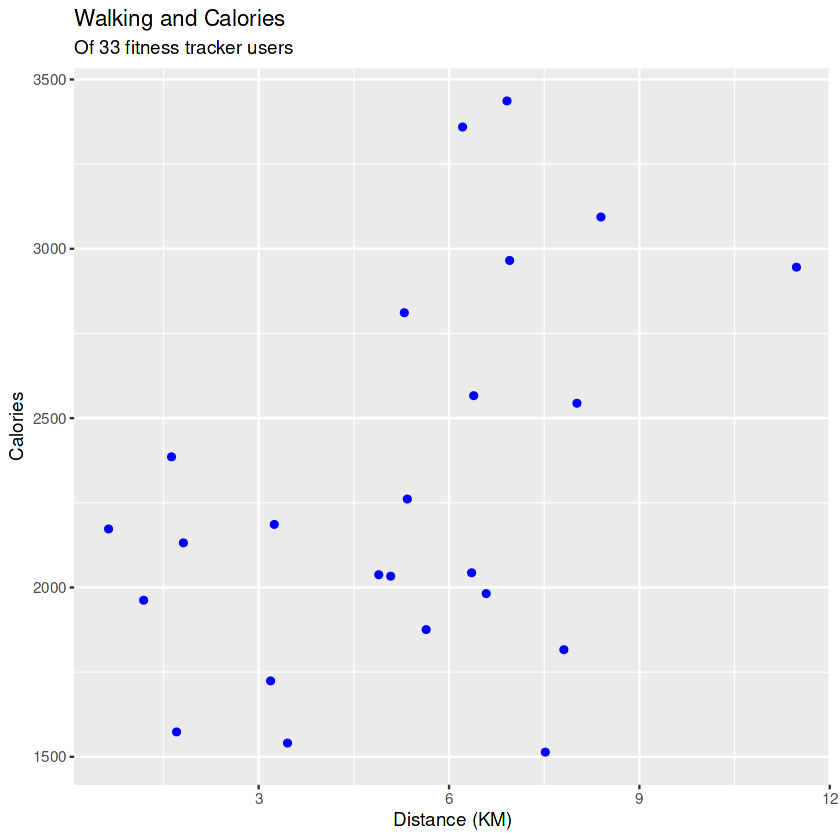

In [16]:
#Visualization of the walking distance and the daily calories
library(ggplot2)

ggplot(data=merged_data) + 
  geom_point(mapping = aes(x=mean_distance_km, y= mean_calories), color="blue") +
  labs(x= "Distance (KM)", y= "Calories", title = "Walking and Calories", subtitle = "Of 33 fitness tracker users")


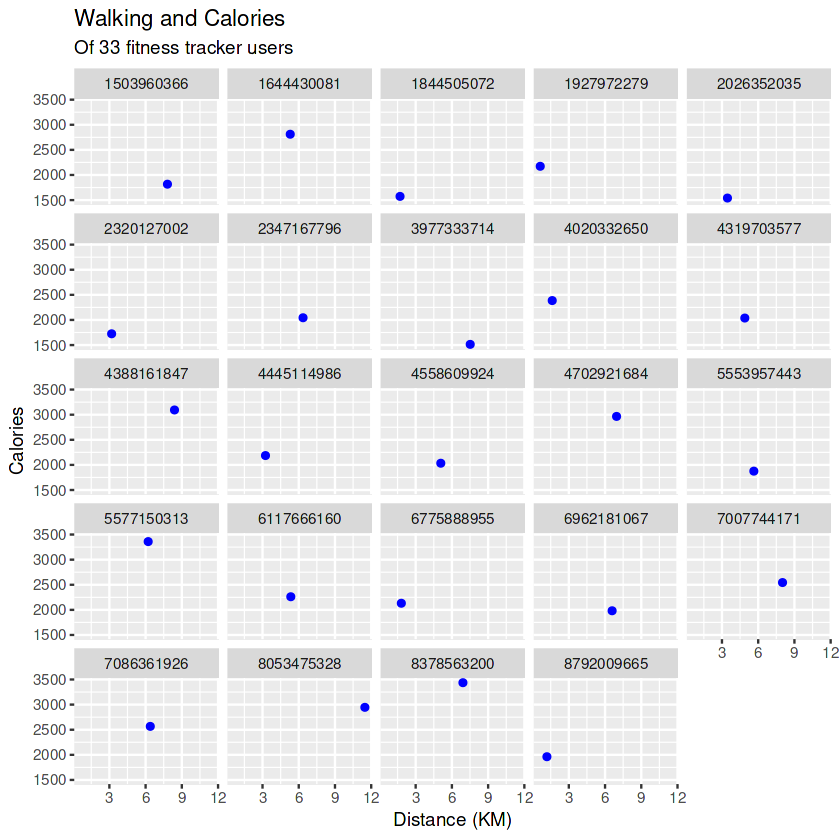

In [17]:
#Visualization of the walking distance and the daily calories per user

ggplot(data=merged_data) + 
  geom_point(mapping = aes(x=mean_distance_km, y= mean_calories), color="blue") +
  facet_wrap(~id)+
  labs(x= "Distance (KM)", y= "Calories", title = "Walking and Calories", subtitle = "Of 33 fitness tracker users")


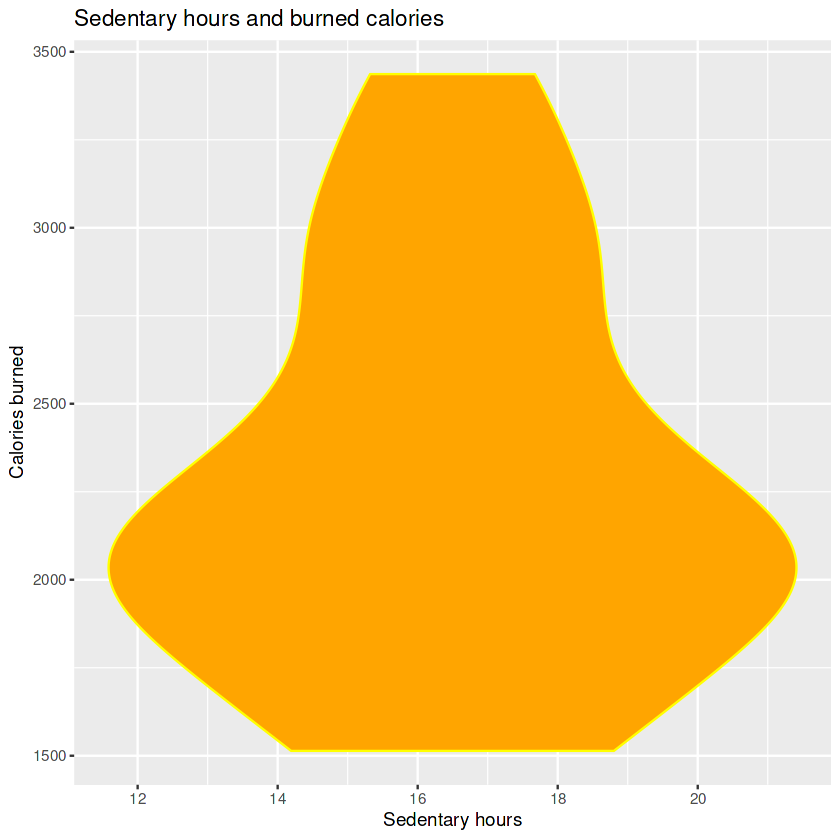

In [18]:
#Visualization of Calories burned and sedentary hours of the users

ggplot(data=merged_data) + 
  aes(x=mean_sedentary_hours, y= mean_calories)+
  geom_violin(color="yellow", fill= "orange") +
  labs(x="Sedentary hours", y= "Calories burned", title = "Sedentary hours and burned calories")


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


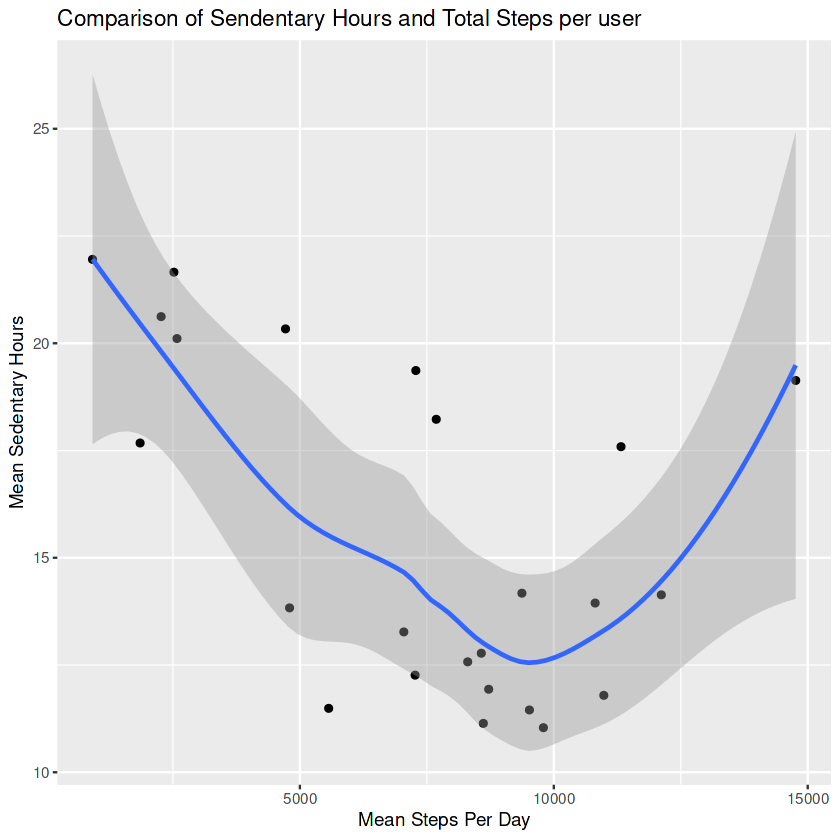

In [19]:
#Visualization of Total Steps and Sedentary hours per ID

ggplot(data=merged_data) +
  aes(x =mean_total_steps , y= mean_sedentary_hours) +
  geom_point() + 
  geom_smooth()+
  labs(x = "Mean Steps Per Day", y= "Mean Sedentary Hours", title= "Comparison of Sendentary Hours and Total Steps per user")